In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [34]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer

# Task 1: Questions

## Eval by LLM

In [37]:
data1 = []
with open('save_questions.jsonl', 'r') as file:
    for line_number, line in enumerate(file, 1):
        try:
            json_line = json.loads(line)
            if 'scores' in json_line:
                data1.append(json_line['scores'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON on line {line_number}: {line.strip()}")


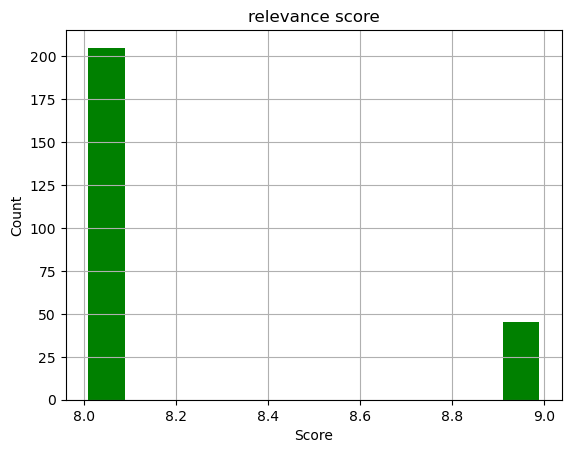

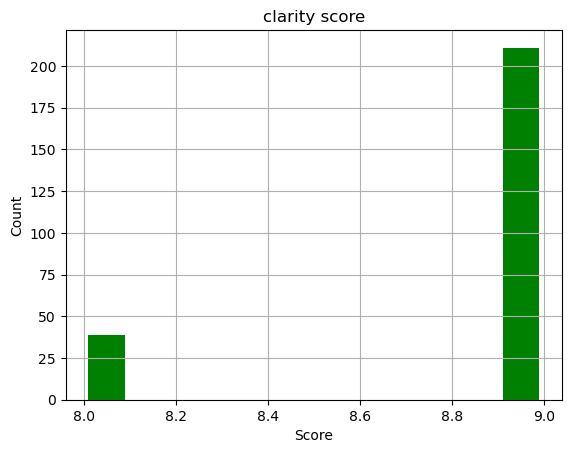

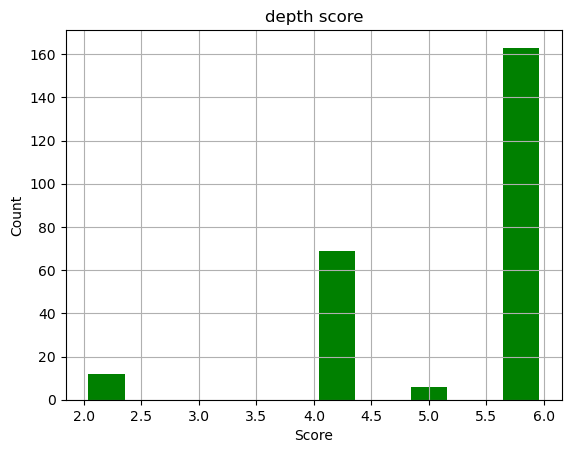

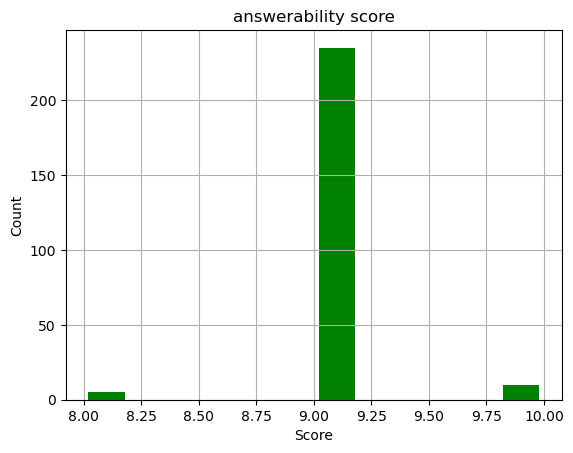

In [38]:
if data1:
    df1 = pd.DataFrame(data1)

    for column in df1.columns:
        # Histogram
        plt.figure()
        df1[column].plot(kind='hist', rwidth=0.8, bins=10, color='green')
        plt.title(f'{column} score')
        plt.xlabel('Score')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

else:
    print("No valid score data found in the file.")

In [54]:
mean_scores1 = df1.mean()
print(mean_scores1)

relevance        8.180
clarity          8.844
depth            5.232
answerability    9.020
dtype: float64


# Task 2

## Eval by LLM

In [39]:
data2 = []
with open('save_answers.jsonl', 'r') as file:
    for line_number, line in enumerate(file, 1):
        try:
            json_line = json.loads(line)
            if 'scores' in json_line:
                data2.append(json_line['scores'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON on line {line_number}: {line.strip()}")


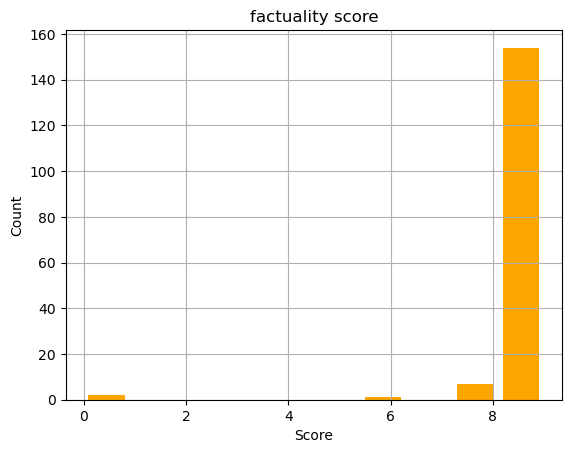

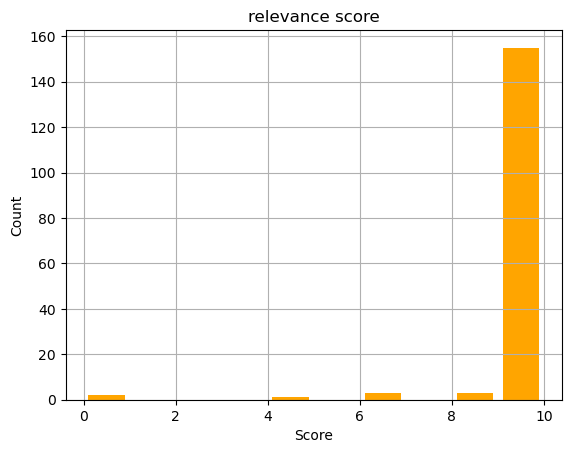

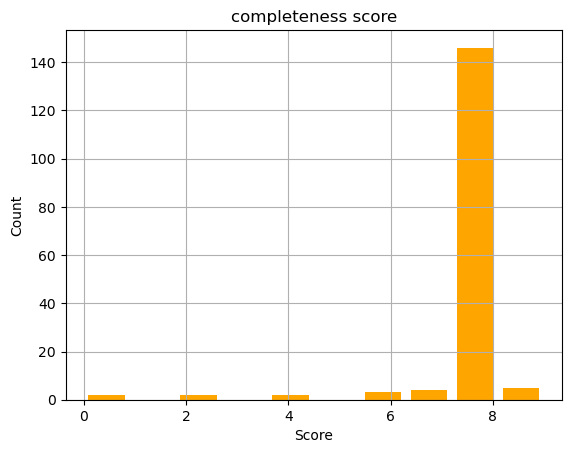

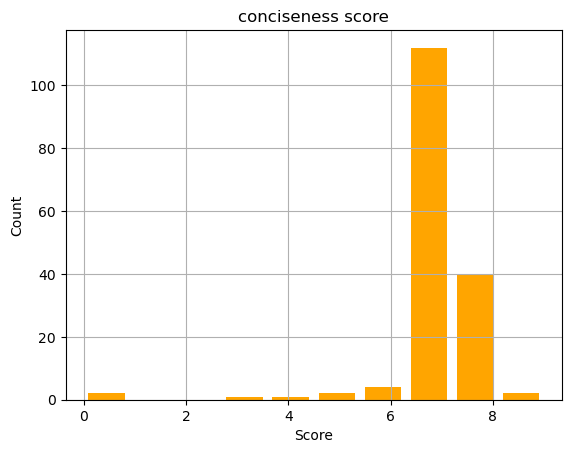

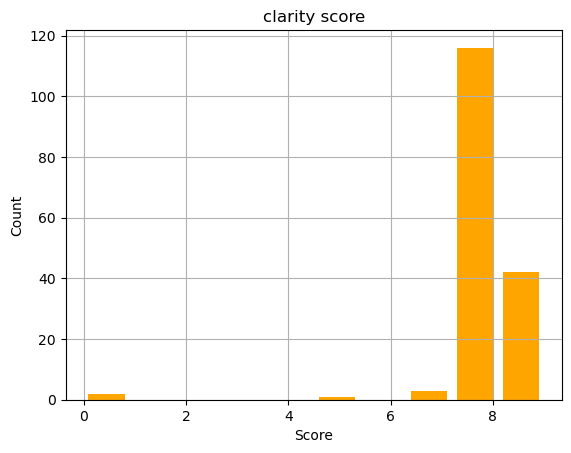

In [40]:
if data2:
    data2 = [item for item in data2 if item is not None]

    df2 = pd.DataFrame(data2)

    for column in df2.columns:
        plt.figure()
        df2[column].plot(kind='hist', rwidth=0.8, bins=10, color='orange')
        plt.title(f'{column} score')
        plt.xlabel('Score')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

else:
    print("No valid score data found in the file.")

In [55]:
mean_scores2 = df2.mean()
print(mean_scores2)

factuality      8.829268
relevance       9.689024
completeness    7.750000
conciseness     7.091463
clarity         8.121951
dtype: float64


## SQuAD 

In [45]:
def exact_match_score(prediction, true_label):
    return int(prediction == true_label)

def compute_f1(prediction, true_label):
    prediction_tokens = prediction.lower().split()
    true_label_tokens = true_label.lower().split()
    common_tokens = set(prediction_tokens) & set(true_label_tokens)
    # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        return 0
    prec = len(common_tokens) / len(prediction_tokens)
    rec = len(common_tokens) / len(true_label_tokens)
    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

In [46]:
data3 = []
with open('save_answers.jsonl', 'r') as f:
    for line in f:
        json_obj = json.loads(line)
        reference_answer = json_obj['reference_answer']
        generated_answer = json_obj['generated_answer']
        exact_match = exact_match_score(generated_answer, reference_answer)
        f1 = compute_f1(generated_answer, reference_answer)
        json_obj['exact_match'] = exact_match
        json_obj['f1'] = f1
        data3.append(json_obj)

df3 = pd.DataFrame(data3)

In [49]:
df3[0:2]

,context,question,reference_answer,generated_answer,id,status,prompt,evaluation,scores,exact_match,f1
0,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,To whom did the Virgin Mary allegedly appear i...,1,PENDING,"You will be given a context, a question about ...","{\n""factuality"": 9,\n""relevance"": 10,\n""comple...","{'factuality': 9, 'relevance': 10, 'completene...",0,0.171429
1,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,"The answer to the question ""What is in front o...",2,PENDING,"You will be given a context, a question about ...","{\n""factuality"": 9,\n""relevance"": 10,\n""comple...","{'factuality': 9, 'relevance': 10, 'completene...",0,0.277778


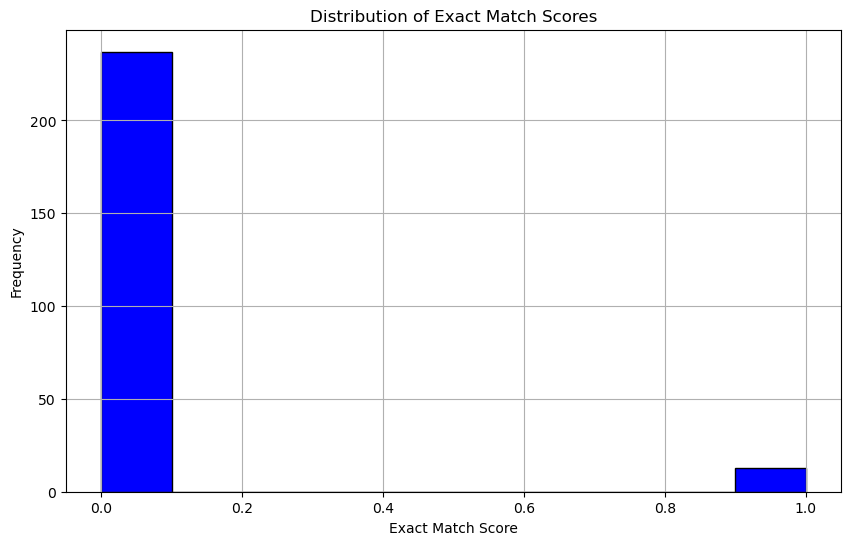

In [50]:
plt.figure(figsize=(10,6))
plt.hist(df3['exact_match'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Exact Match Scores')
plt.xlabel('Exact Match Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

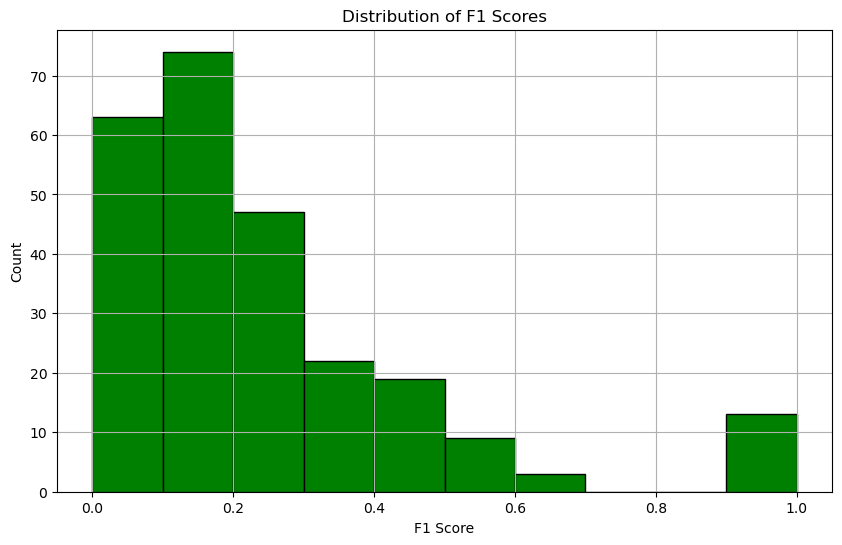

In [52]:
plt.figure(figsize=(10,6))
plt.hist(df3['f1'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of F1 Scores')
plt.xlabel('F1 Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()